# 1. Regression Models

In this section, regression methods are used to analyse the performance of some companies in the S&P500 index

## 1.1 Processing stock data in Python

### 1.1.1 Logarithmic prices

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
px = pd.read_csv(r"../Data/priceData.csv")

# Convert date column to datetime
px["date"] = pd.to_datetime(px["date"], format = '%d/%m/%Y')
px.set_index('date', inplace=True)
px

,SPX Index
date,
1930-01-02,21.18
1930-01-03,21.23
1930-01-06,21.50
1930-01-07,21.31
1930-01-08,21.29
...,...
2017-06-15,2432.46
2017-06-16,2433.15
2017-06-19,2453.46


In [132]:
# Remove null values

null_rows_count_before = px.isnull().any(axis=1).sum()
px.dropna(axis=0, inplace = True)
null_rows_count_after = px.isnull().any(axis=1).sum()
print(null_rows_count_before, null_rows_count_after)
print(px.info())


655 0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21974 entries, 1930-01-02 to 2017-06-21
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SPX Index  21974 non-null  float64
dtypes: float64(1)
memory usage: 343.3 KB
None


<Axes: xlabel='date'>

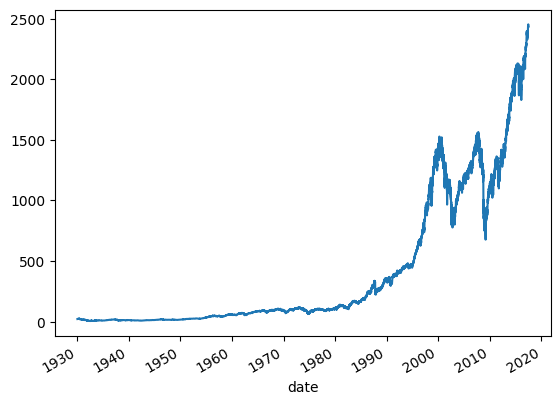

In [136]:
# Plot prices and log prices
SPX = px["SPX Index"]
SPX.plot()

<Axes: xlabel='date'>

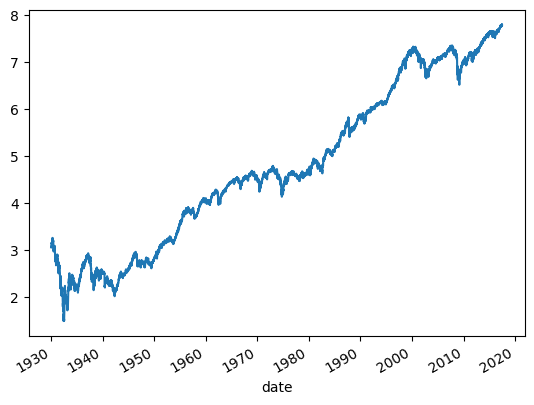

In [135]:
px["logSPX"] = np.log(SPX)
logSPX = px["logSPX"]
logSPX.plot()

### 1.1.2 Stationary analysis using rolling statistics

A stochastic process is **stationary** if, when shifted in time, its unconditional join probability distribution does not change and consequently its first moment is time-invariant.

While the sliding mean performs a smoothing operation on the signal, the standard deviation gives information on the price volatility. The plot belows imply non-stationary as the moving average (MA) follows an upwards respect to time. Thus, both price and the log-price time-series do not imply time-invariant statistics, meaning they are non-stochastic processes.



In [137]:
#Defining sliding window size
window = 252

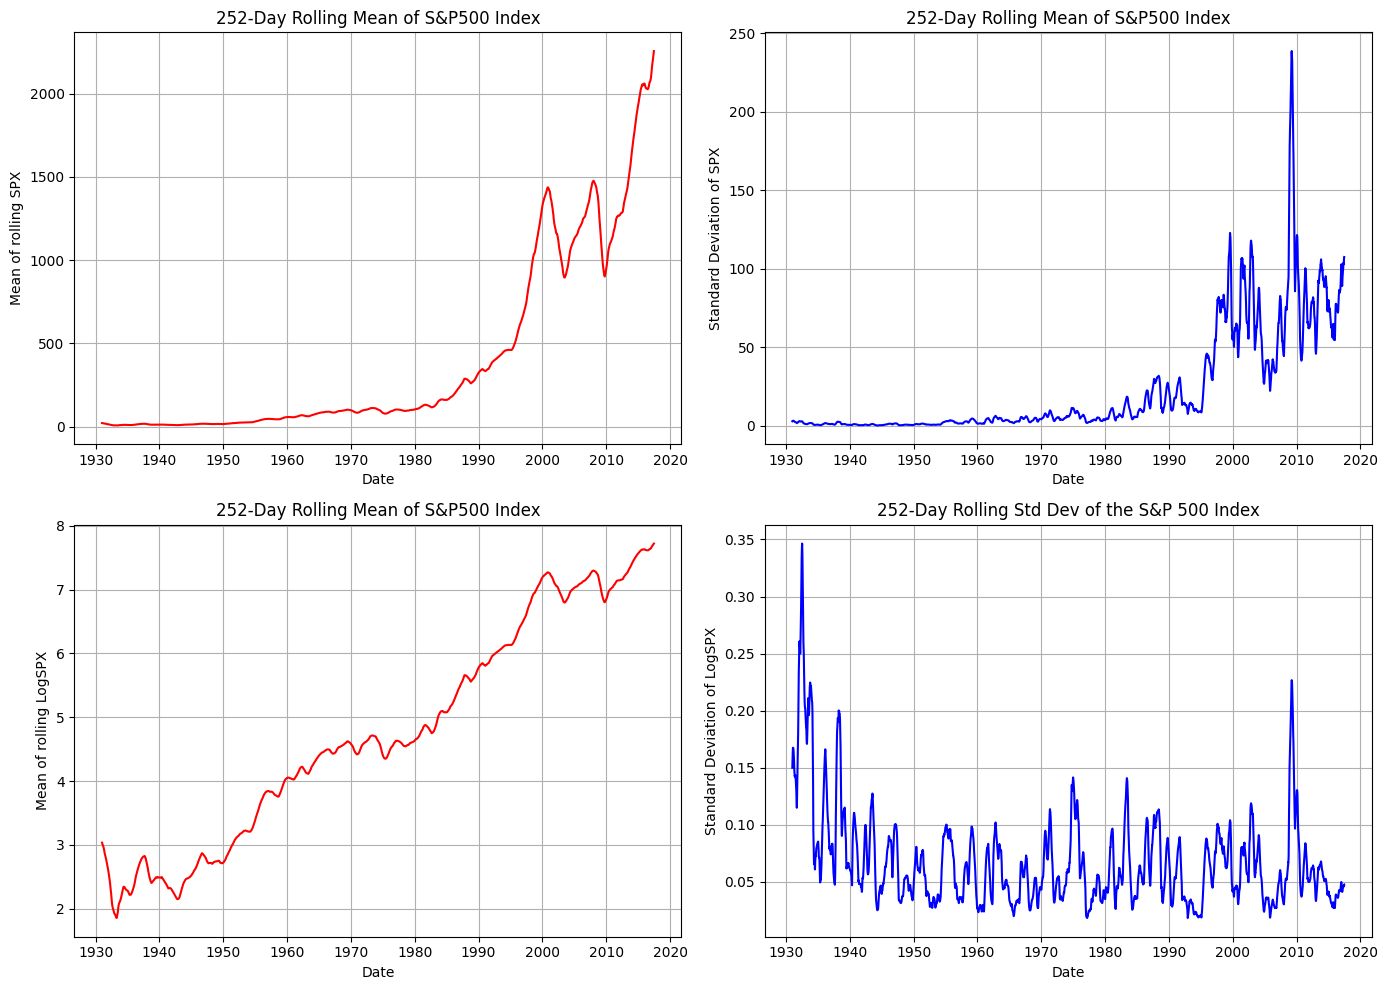

In [152]:
# Define subplots
fig, axs = plt.subplots(2,2, figsize=(14,10))

# Sliding mean 
axs[0,0].plot(SPX.rolling(window).mean(), color = 'red')
axs[0,0].set_title("252-Day Rolling Mean of S&P500 Index")
axs[0,0].set_xlabel("Date")
axs[0,0].set_ylabel("Mean of rolling SPX")
axs[0,0].grid(True)

# Sliding standard deviation
axs[0,1].plot(SPX.rolling(window).std(), color = 'blue')
axs[0,1].set_title("252-Day Rolling Mean of S&P500 Index")
axs[0,1].set_xlabel("Date")
axs[0,1].set_ylabel("Standard Deviation of SPX")
axs[0,1].grid(True)

# Sliding log-prices mean
axs[1,0].plot(logSPX.rolling(window).mean(), color = 'red')
axs[1,0].set_title("252-Day Rolling Mean of S&P500 Index")
axs[1,0].set_xlabel("Date")
axs[1,0].set_ylabel("Mean of rolling LogSPX")
axs[1,0].grid(True)

# Sliding log-prices standard deviation
axs[1,1].plot(logSPX.rolling(window).std(), color = 'blue')
axs[1,1].set_title('252-Day Rolling Std Dev of the S&P 500 Index')
axs[1,1].set_xlabel('Date')
axs[1,1].set_ylabel('Standard Deviation of LogSPX')
axs[1,1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### 1.1.3 Compute simple and log return

The Simple Return is defined as:

$R = \frac{P_{\text{end}} - P_{\text{start}}}{P_{\text{start}}} $

where:
- $R$ is the return.
- $P_{\text{end}}$ is the ending price.
- $P_{\text{start}}$ is the starting price.


The logarithmic return is defined as:

$R_{\text{log}} = \log\left(\frac{P_{\text{end}}}{P_{\text{start}}}\right)$

where:
- $R_{\text{log}}$ is the log return.
- $P_{\text{end}}$ is the ending price.
- $P_{\text{start}}$ is the starting price.





In [153]:
#log return & simple returns
logret = logSPX.diff()
simpret = SPX.pct_change()

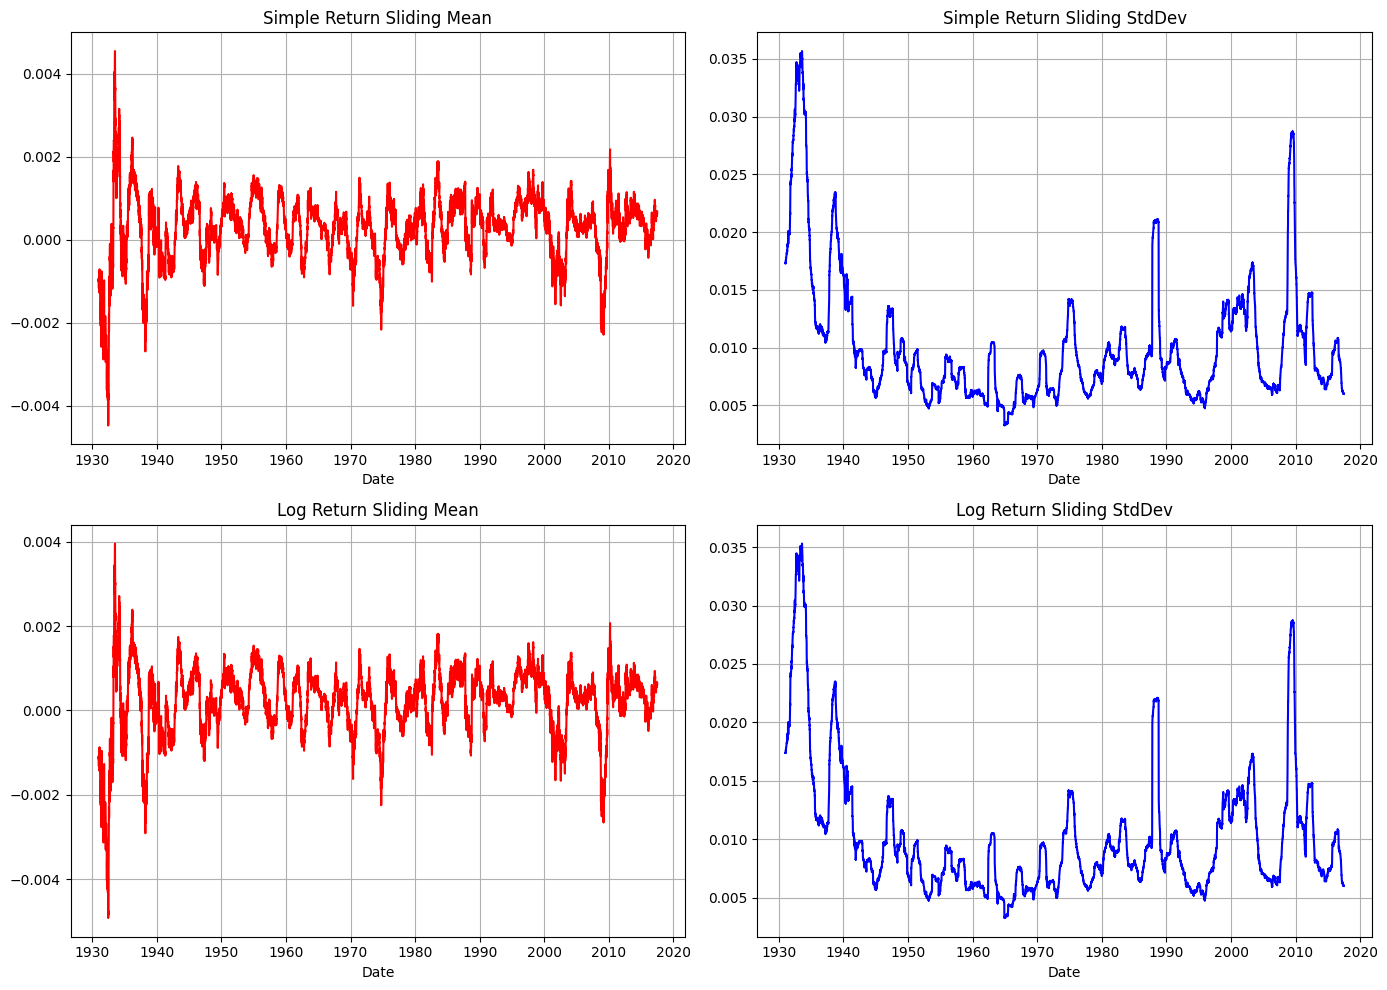

In [154]:
#sliding window of 252 day using 1-day increment
fig, axs = plt.subplots(2,2, figsize=(14,10))

# Sliding mean
axs[0,0].plot(simpret.rolling(window).mean(), color = 'red')
axs[0,0].set_title("Simple Return Sliding Mean")
axs[0,0].set_xlabel("Date")
axs[0,0].grid(True)

# Sliding standard deviation
axs[0,1].plot(simpret.rolling(window).std(), color = 'blue')
axs[0,1].set_title("Simple Return Sliding StdDev")
axs[0,1].set_xlabel("Date")
axs[0,1].grid(True)

# Sliding log-prices mean
axs[1,0].plot(logret.rolling(window).mean(), color = 'red')
axs[1,0].set_title("Log Return Sliding Mean")
axs[1,0].set_xlabel("Date")
axs[1,0].grid(True)

# Sliding log-prices standard deviation
axs[1,1].plot(logret.rolling(window).std(), color = 'blue')
axs[1,1].set_title('Log Return Sliding StdDev')
axs[1,1].set_xlabel('Date')
axs[1,1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### 1.1.4: Advantages of log-returns and Jarque-Bera test

Using logarithmic return has several advantages over using simple return, including:
1. Logarithmic function is monotonic, which means that the relative order is preserved, i.e. for all a and b such that $a > b$ then $log(a) > log(b)$
2. Logarithmic returns are symmetrical in terms of percentage changes. A 10% increase followed by a 10% decrease will bring the value to the original value. Simple returns do not share this property. 
3. Prices are log-normally distributed over faily short time period. Gaussianity is a fundamental advantage as several signal processing and statistical techniques require it.
4. Logarithms are more convenient mathematical operators when performing advanced calculus and provide better numerical stability.

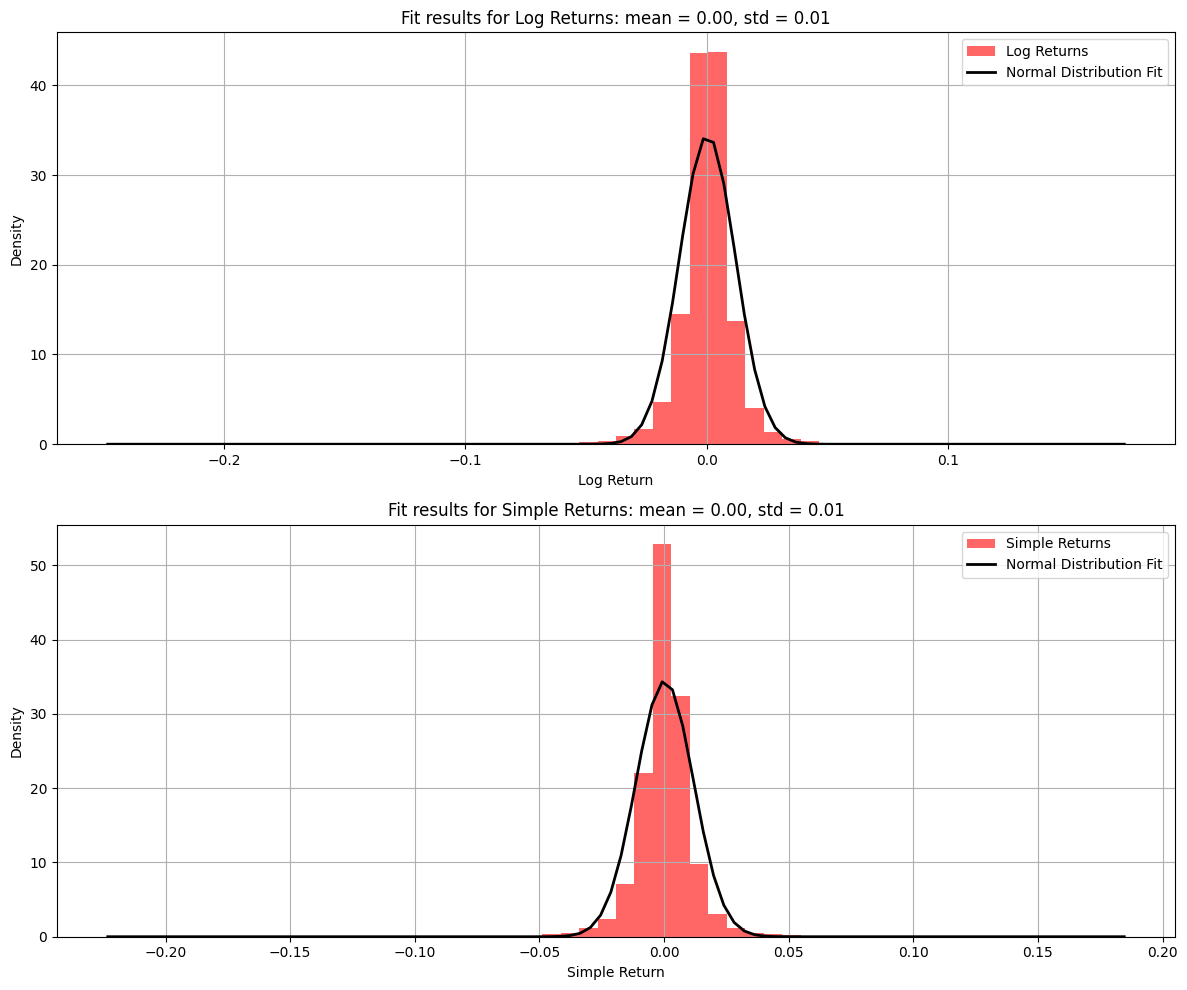

In [170]:
from scipy import stats

# Plotting
plt.figure(figsize=(12,10))

# Plot PDF Histogram and fir for log-return
plt.subplot(2,1,1)
plt.hist(logret, bins=50, alpha=0.6, color="r", density = True, label = "Log Returns")
mean_log, std_log = np.mean(logret), np.std(logret)
xmin, xmax = plt.xlim()
x_log = np.linspace(xmin, xmax, 100)
p_log = stats.norm.pdf(x_log, mean_log, std_log)
plt.plot(x_log, p_log, 'k', linewidth=2, label='Normal Distribution Fit')
plt.title(f"Fit results for Log Returns: mean = {mean_log:.2f}, std = {std_log:.2f}")
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Plot PDF Histogram and fit for simple return
plt.subplot(2,1,2)
plt.hist(simpret, bins=50, alpha=0.6, color="r", density = True, label = "Simple Returns")
mean_simp, std_simp = np.mean(simpret), np.std(simpret)
xmin, xmax = plt.xlim()
x_simp = np.linspace(xmin, xmax, 100)
p_simp = stats.norm.pdf(x_simp, mean_simp, std_simp)
plt.plot(x_simp, p_simp, 'k', linewidth=2, label='Normal Distribution Fit')
plt.title(f"Fit results for Simple Returns: mean = {mean_simp:.2f}, std = {std_simp:.2f}")
plt.xlabel('Simple Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjust layout to avoid cutting off content
plt.show()



Gaussianity of data cannot only be imprically proved, but also estimated using the ***Jarque-Bera test***. This statistic is a GOF (goodness-of-fit) technique that tests how far the dataset deviates from normal distribution in terms of skewness (=0; symmetries of data around the mean) and kurtosis (= 3; how thick are the tails).

The test is computed as:

$JB = n \left(\frac{S^2}{6} + \frac{(K - 3)^2}{24}\right) $ where: 
- $n$  is the number of observations
- $S$  is the skewness
- $K$  is the kurtosis.

The test statistic is always non-negative. If it far from zero, it signals the data do not have a normal distribution.

If the data comes from a normal distribution, the JB statistic "asymptotically" has a chi-squared distribution with two degree of freedom.

The graph shows the JB curve with respect to the number of testing data points. It clearly shows the difference among two curves increase in respect to the number of data points. Logarithmic returns are proven to deviate more slowly from simple return, claiming that it is closer to following a normal distribution.  

In [198]:
# Return Jarque-Bera test p-value for a time-series x
logret = logret.dropna()
simpret = simpret.dropna()

jb_logret_result= stats.jarque_bera(logret)# JB test stats and p-value

print(jb_logret_result[0])
print(logret.head())
print(logret.describe())
jb_simpret_test_stat, jb_simpret_p_value = stats.jarque_bera(simpret)

309277.64126696065
date
1930-01-03    0.002358
1930-01-06    0.012638
1930-01-07   -0.008876
1930-01-08   -0.000939
1930-01-09    0.015381
Name: logSPX, dtype: float64
count    21973.000000
mean         0.000216
std          0.011587
min         -0.228997
25%         -0.004574
50%          0.000434
75%          0.005305
max          0.153661
Name: logSPX, dtype: float64


JB Test Statistic for Log Returns: 309277.64126696065
JB P-value for Log Returns: 0.0
JB Test Statistic for Simple Returns: 257540.0649368358
JB P-value for Simple Returns: 0.0


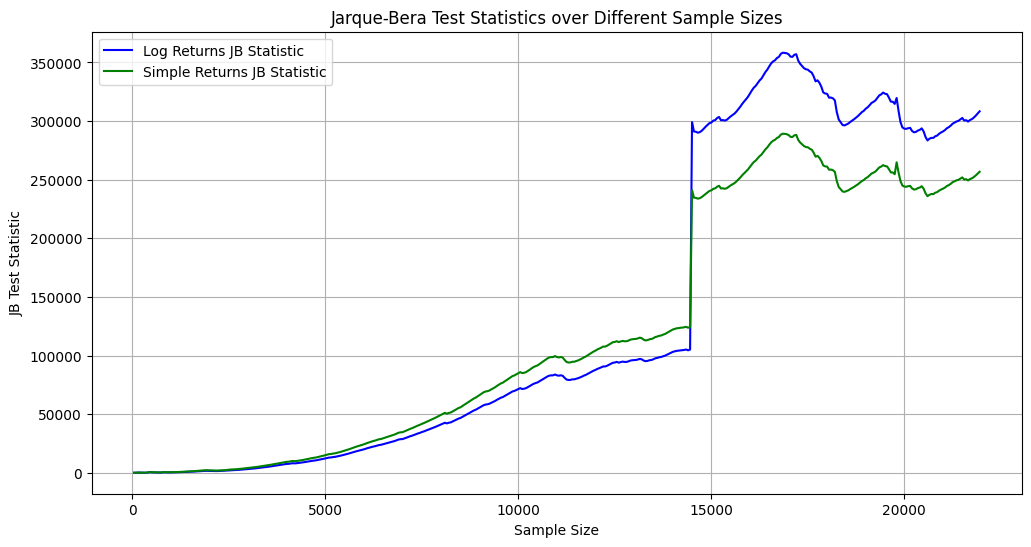

In [199]:
logret = logret.dropna()
simpret = simpret.dropna()

# JB test initially to see the overall stats
jb_logret_result = stats.jarque_bera(logret)
jb_simpret_result = stats.jarque_bera(simpret)

print("JB Test Statistic for Log Returns:", jb_logret_result[0])
print("JB P-value for Log Returns:", jb_logret_result[1])
print("JB Test Statistic for Simple Returns:", jb_simpret_result[0])
print("JB P-value for Simple Returns:", jb_simpret_result[1])

# Define sample sizes
sample_sizes = np.arange(50, len(logret) + 1, 50) 

# Lists to store JB test results for plotting
jb_stats_log = []
jb_stats_simple = []

# Calculate JB stats for each sample size
for size in sample_sizes:
    sample_log = logret.iloc[:size]
    sample_simple = simpret.iloc[:size]
    
    jb_result_log = stats.jarque_bera(sample_log)
    jb_result_simple = stats.jarque_bera(sample_simple)
    
    # Collecting test statistics
    jb_stats_log.append(jb_result_log[0])
    jb_stats_simple.append(jb_result_simple[0])

# Plotting the JB test statistics over different sample sizes
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, jb_stats_log, label='Log Returns JB Statistic', color='blue')
plt.plot(sample_sizes, jb_stats_simple, label='Simple Returns JB Statistic', color='green')

plt.title('Jarque-Bera Test Statistics over Different Sample Sizes')
plt.xlabel('Sample Size')
plt.ylabel('JB Test Statistic')
plt.legend()
plt.grid(True)
plt.show()

### 1.1.5: Stock purchase example

You purchase a stock for £1. The next day its value goes up to £2 and the following day back to £1. What are the simple and logarithmic returns over this period and what can you conclude about logarithmic returns on the basis of this example?

Previous paragraph explained why logarithmic returns are a better metric at describing the changes in value of an asset over time. Given the situation, the stock has not changed its value over time given the price eventually falls back to £1. However, looking at the simple return [1, -0.5], their sum does not add up to zero, making it an obstacle to visualize value gain/loss. However, the logarithmic return [-0.69, 0.69] cancel out, giving a better intution that the asset did not gain or lose any value.

In [214]:
example = pd.Series([1,2,1])
print("Simple return: ", example.pct_change()[1:].tolist())
print("Log return: ", np.log(example).diff()[1:].tolist())
#ok


Simple return:  [1.0, -0.5]
Log return:  [0.6931471805599453, -0.6931471805599453]


### 1.1.6: Advantages of simple returns

While log returns are preferred for their accuracy and suitability in continuous time series analysis, simple returns are highly recommended for long-term investments and communication with general audience due to its intuiotion and straightforward meaning. Furthermore, simple returns are additive across multiple assets - while log returns are not - making it a suitable calculation method for portfolio formulation.